# Feature_selection-Part1

# Data reading

In [1]:
import nltk
import pandas as pd
#https://www.kaggle.com/pceccon/countvectorizer-and-tfidf-strategies

In [2]:
SMS_data=pd.read_csv('/Users/atousa/Desktop/McMaster/BDA-102/Week3-feature_selection/Spam_data.csv',sep='\t',names=['label','text'])

In [3]:
SMS_data.head(n=5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
SMS_data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
SMS_data.shape

(5572, 2)

# Data Cleaning

In [6]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
#nltk.download('punkt')

In [7]:
i=0
for txt in SMS_data['text']:
     w_list = re.sub(r'[^a-z\s]',' ',txt.lower()).split()
     w_list=[w for w in w_list if w not in stopwords.words('english')]
     SMS_data.ix[i,'text']=' '.join(w_list)
     i+=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [8]:
SMS_data.loc[SMS_data['label']=='spam','label_num']=1
SMS_data.loc[SMS_data['label']=='ham','label_num']=0

In [9]:
SMS_data.head()

,label,text,label_num
0,ham,go jurong point crazy available bugis n great ...,0.0
1,ham,ok lar joking wif u oni,0.0
2,spam,free entry wkly comp win fa cup final tkts st ...,1.0
3,ham,u dun say early hor u c already say,0.0
4,ham,nah think goes usf lives around though,0.0


In [10]:
df_x=SMS_data['text']
df_y=SMS_data['label']

# Feature selection

TF

In [27]:
#generate the count word and features based on frequency
from sklearn.feature_extraction.text import CountVectorizer
cv1=CountVectorizer() #min_df=1
updated_x1=cv1.fit_transform(df_x)
fn1=cv1.get_feature_names()

In [28]:
a=updated_x1.todense()

In [29]:
len(fn1)

7623

In [30]:
type(updated_x1)

scipy.sparse.csr.csr_matrix

In [31]:
(updated_x1.shape)

(5572, 7623)

In [50]:
len(fn1)

7623

In [33]:
dense_x1=updated_x1.todense()
sum_x1=dense_x1.sum(axis=0)

In [34]:
np.shape(sum_x1)

(1, 7623)

In [35]:
dense_x1.shape

(5572, 7623)

In [53]:
sum_x1.shape

(1, 7623)

In [36]:
import numpy as np
sort_list=np.argsort(sum_x1)

In [37]:
sort_list.shape

(1, 7623)

In [56]:
for i in range(0,10,1):
    print(fn1[np.array(sort_list)[0,i]])

aa
nauseous
natwest
nattil
nationwide
naseeb
narcotics
nannys
nanny
nange


TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [29]:
cv2=TfidfVectorizer(sublinear_tf=True,min_df=1)#,stop_words='english')
updated_x2=cv2.fit_transform(df_x)
fn2=cv2.get_feature_names()
# the result is a sparse matric 

In [31]:
np.shape(updated_x2)

(5572, 7623)

In [43]:
# it removed the stopwords
np.shape(updated_x2)

(5572, 7623)

In [45]:
dense_x2=updated_x2.todense()
sum_x2=dense_x2.sum(axis=0)
import numpy as np
sort_list=np.argsort(sum_x2)
for i in range(0,10,1):
    print(fn2[np.array(sort_list)[0,i]])

suply
corrupt
deposited
ki
karo
blocked
pura
imf
lac
projects


# Matric Reduction

Percentile

In [30]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import feature_selection
#f_classif:ANOVA F-value between label/feature for classification tasks.
selector=SelectPercentile(f_classif,percentile=10)
selector.fit(updated_x2,df_y)
feature_transformed=selector.transform(updated_x2).toarray()

In [150]:
np.shape(feature_transformed)

(5572, 763)

In [39]:
np.shape(mask2)

(1, 7623)

[[False False False ... False False False]]


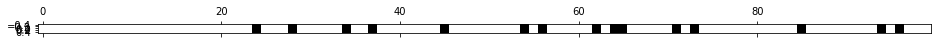

In [35]:
import matplotlib.pyplot as plt
mask=np.asarray(selector.get_support())
mask2=mask.reshape(1,-1)
print(mask2)
%matplotlib inline
plt.matshow(mask2[:,:100],cmap='gray_r')

In [41]:
#support = np.asarray(selector.get_support())
idx = np.arange(0, len(fn2))  #create an index array
features_to_keep = idx[mask== True].astype(int)

In [154]:
#fn2.items()[list(features_to_keep)[:10]]
fn2=list(np.array(fn2)[features_to_keep])

In [155]:
len(fn2)

763

In [160]:
np.transpose(fn2[:100])

array(['abta', 'ac', 'access', 'accident', 'account', 'acl', 'aco',
       'action', 'activate', 'active', 'adam', 'addamsfa', 'admirer',
       'ads', 'adult', 'advise', 'ae', 'ag', 'age', 'aj', 'alert',
       'alfie', 'algarve', 'already', 'always', 'amazing', 'among', 'amp',
       'announcement', 'ans', 'ansr', 'anything', 'anytime', 'app',
       'apply', 'arcade', 'area', 'arrive', 'arsenal', 'asap', 'ask',
       'asp', 'attempt', 'auction', 'august', 'await', 'awaiting',
       'award', 'awarded', 'bahamas', 'balance', 'bcm', 'bears', 'bid',
       'biggest', 'billed', 'biz', 'blonde', 'bloomberg', 'bluetooth',
       'bonus', 'box', 'bp', 'bray', 'british', 'britney', 'bt', 'bulbs',
       'bx', 'call', 'callback', 'callcost', 'caller', 'callfreefone',
       'calls', 'camcorder', 'camera', 'canary', 'careers', 'cash',
       'cashto', 'cc', 'cd', 'cdgt', 'cds', 'celeb', 'ch', 'chance',
       'chances', 'charge', 'charged', 'charity', 'chart', 'chat',
       'choice', 'choos

SVD

In [43]:
from scipy.linalg import svd
u,s,v=svd(updated_x2.todense(),full_matrices=False)

In [52]:
s.shape

(5572,)

In [59]:
updated_x2.shape

(5572, 7623)

In [49]:
rank=2
uk=u[:,0:rank]
sk=np.diag(s)[0:rank,0:rank]
vk=v[0:rank,:]

In [53]:
vk.shape

(2, 7623)

In [54]:
len(cv2.get_feature_names())

7623

In [55]:
aa=np.argsort(vk,axis=1)
for t in range(rank):
    print('------ topic number'+str(t)+'--------')
    for i in range(10):
        print(cv2.get_feature_names()[aa[t,i]])

------ topic number0--------
trouser
korli
outfit
whore
anderson
ie
idps
erutupalam
stitch
nutter
------ topic number1--------
ok
lor
come
go
ur
thanx
home
wat
get
yup
